<a href="https://colab.research.google.com/github/Shubhangiwaghmare7/Data-Science/blob/main/MnistDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

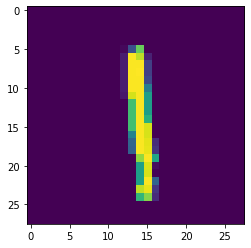

In [6]:
#visualization of data
plt.imshow(X_train[8])

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
#normalizing the data (0,1)
#pixel=0.255
X_train,X_test=X_train/255.0,X_test/255.0

In [9]:
X_train,X_test=X_train.reshape(60000,28,28,1),X_test.reshape(10000,28,28,1)

In [10]:
#model architecture
model= Sequential()

model.add(Conv2D(32,3,activation='relu',padding='same',kernel_initializer='he_uniform'))#Con Layer 1
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,3,activation='relu',padding='same',kernel_initializer='he_uniform'))#Con Layer 2
model.add(MaxPool2D(2,2))

model.add(Conv2D(128,3,activation='relu',padding='same',kernel_initializer='he_uniform'))#Con Layer 3
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64,activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))


In [12]:
model.compile('SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 38s 3ms/step - loss: 1.7812 - accuracy: 0.3787
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3595 - accuracy: 0.9034
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2038 - accuracy: 0.9454
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1523 - accuracy: 0.9600
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1243 - accuracy: 0.9685
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1099 - accuracy: 0.9723
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0946 - accuracy: 0.9769
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0817 - accuracy: 0.9795
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0751 - accuracy: 0.9802
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.07

In [14]:
y_pred=model.predict(X_test)
y_pred

array([[7.9685396e-06, 4.2632832e-06, 7.8242874e-06, ..., 9.9987984e-01,
        1.0412707e-07, 7.1402050e-05],
       [6.5835161e-06, 7.0082082e-05, 9.9975115e-01, ..., 2.3181494e-05,
        5.1390285e-05, 3.4754649e-08],
       [1.6822236e-05, 9.9983716e-01, 4.2904227e-05, ..., 2.4037225e-05,
        1.4161891e-05, 1.1088237e-07],
       ...,
       [6.6762595e-08, 3.9069246e-06, 6.1837254e-06, ..., 3.2969708e-06,
        1.5283308e-07, 2.2207900e-05],
       [8.8586676e-05, 5.6399938e-09, 1.9960849e-07, ..., 6.3566468e-08,
        7.3271782e-05, 5.3751188e-05],
       [6.7419014e-06, 2.5912748e-08, 2.7400043e-07, ..., 1.4194530e-10,
        1.3623860e-05, 2.8729062e-06]], dtype=float32)

In [15]:
y_pred[2]

array([1.6822236e-05, 9.9983716e-01, 4.2904227e-05, 1.8813974e-07,
       6.1612394e-05, 3.1224887e-09, 2.9587686e-06, 2.4037225e-05,
       1.4161891e-05, 1.1088237e-07], dtype=float32)